# **Problem Statement:**

---


# Profitability:
- Analyze an E-commerce dataset to understand and predict profitability across different product categories and customer segments.

# Identify Key Trends:
- Examine trends and patterns in the data, such as monthly variations, most sold products, and category-wise performance.

# Clean The Data and Preprocess

- Address missing values, duplicates, and outliers in the dataset.
- Convert and extract relevant date information from date columns.

# Explore Relationships:

- Investigate relationships between features such as sales, quantity sold, discount, and shipping cost.

# Predicting Profit:

- Build and evaluate regression models to predict profit based on selected features.

# Model Performance Assessment:
- Compare different models such as linear regression, decision trees, and random forest.
- Evaluate model performance using metrics like mean squared error (MSE) and R-squared (R2).

# Derive Insights:

- Generate insights into factors impacting profitability and provide recommendations to optimize operations and improve profitability for the business.

# **Data Collection**

---
Data collection is a crucial step in any data analysis or machine learning project. It involves gathering relevant data from various sources to be used for analysis and model training. The data contains US E-Commerce records 2020.

[Click for dataset](https://github.com/Loki-30G/E-Commerce/tree/main/Dataset)


# **Existing solution**

---

- The existing solutions involve established methodologies and approaches that data scientists and analysts use to process, analyze, and model data effectively.
- These solutions build upon years of research and best practices in data science and analytics.

# **Proposed Solution:**

---


# Data Cleaning and Preprocessing:
- Remove missing values and duplicates from the dataset.
- Convert date columns to appropriate data types and extract relevant information such as month and day of the week.
- Normalize numerical columns and handle outliers for better model performance.

# Insights:
- Based on the analysis, derive insights into the factors that have the most significant impact on profit.
- Provide recommendations for the E-commerce business on how to optimize their operations to improve profitability.

# Exploratory Data Analysis:
- Create data visualizations such as histograms, boxplots, scatter plots, and heatmaps to explore relationships between different features.
- Identify top-selling products and categories, as well as category-wise and monthly variations in sales and quantity.

# Model Building and Evaluation:
- Split the data into training and testing sets.
- Train different regression models (e.g., linear regression, K-Nearest Neighbors, decision trees, random forest) on the training data.
- Evaluate model performance using metrics such as mean squared error (MSE) and R-squared (R2).
- Compare the performance of different models to identify the best model for predicting profit.


This proposed solution aims to provide a comprehensive analysis of the E-commerce dataset and use the insights gained to create predictive models for profitability. These models can help guide strategic decision-making for the business.

# **Results:**

---


**1.Model Performance:**
- The code outputs a DataFrame (results_df) containing performance metrics (Mean Squared Error and R-squared) for each model.
- The bar plots in the last section of the code show the performance comparison among the models.

**2.Findings:**
- The model with the lowest Mean Squared Error (MSE) and the highest R-squared (R2) is likely the best-performing model for the given data.
- Random forest is often a strong performer for regression tasks due to its ability to handle non-linear relationships and complex interactions between features.

**3.Conclusion:**
- Based on the performance metrics, you can choose the best model for predicting profit in the e-commerce data.
- Additional analysis and tuning could be conducted to further optimize the chosen model.

Overall, the workflow provides a comprehensive approach to data analysis and modeling, including data cleaning, exploratory data analysis, and model evaluation. Adjustments and additional steps can be made based on specific project goals and requirements.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries for data visualization and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sqlite3 import connect

In [ ]:
# Load data and read it into a DataFrame
df = pd.read_csv('/content/US  E-commerce records 2020.csv', encoding='latin1')

In [ ]:
# Display the first 5 rows of data
df.head(10)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
5,01-01-20,8072,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,4,0.3,-26.6352
6,01-01-20,8073,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4,0.2,2.2288
7,01-01-20,8074,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
8,01-01-20,8075,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842
9,01-01-20,8076,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212


In [ ]:
# Display the bottom 5 rows of data
df.tail(5)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3307,30-12-20,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
3311,30-12-20,5092,CA-2017-156720,Standard Class,JM-15580,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [ ]:
# Check the shape of the data
df.shape

(3312, 19)

In [ ]:
# View info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

# Data Cleaning and Preprocessing:

In [ ]:
# Identify categorical and numerical features
categoricals = df.dtypes[df.dtypes == 'object'].index.tolist()
numericals = df.dtypes[df.dtypes != 'object'].index.tolist()
print('Categorical features:', categoricals)
print('Numerical features:', numericals)

Categorical features: ['Order Date', 'Order ID', 'Ship Mode', 'Customer ID', 'Segment', 'Country', 'City', 'State', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name']
Numerical features: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
# Print unique values in each categorical feature
for i in range(len(categoricals)):
    print(categoricals[i], 'unique values', df[categoricals[i]].unique(), '\n')

Order Date unique values ['01-01-20' '02-01-20' '03-01-20' '06-01-20' '07-01-20' '08-01-20'
 '09-01-20' '12-01-20' '13-01-20' '14-01-20' '15-01-20' '16-01-20'
 '19-01-20' '20-01-20' '21-01-20' '22-01-20' '23-01-20' '24-01-20'
 '26-01-20' '27-01-20' '28-01-20' '29-01-20' '30-01-20' '02-02-20'
 '03-02-20' '04-02-20' '05-02-20' '06-02-20' '09-02-20' '10-02-20'
 '11-02-20' '13-02-20' '16-02-20' '17-02-20' '18-02-20' '19-02-20'
 '20-02-20' '21-02-20' '23-02-20' '24-02-20' '25-02-20' '26-02-20'
 '28-02-20' '02-03-20' '03-03-20' '04-03-20' '05-03-20' '06-03-20'
 '07-03-20' '08-03-20' '09-03-20' '10-03-20' '11-03-20' '12-03-20'
 '13-03-20' '14-03-20' '16-03-20' '17-03-20' '18-03-20' '19-03-20'
 '20-03-20' '21-03-20' '23-03-20' '24-03-20' '25-03-20' '26-03-20'
 '27-03-20' '28-03-20' '29-03-20' '30-03-20' '31-03-20' '01-04-20'
 '02-04-20' '03-04-20' '04-04-20' '06-04-20' '07-04-20' '08-04-20'
 '09-04-20' '10-04-20' '11-04-20' '12-04-20' '13-04-20' '14-04-20'
 '15-04-20' '16-04-20' '17-04-20' '20

In [ ]:
# Remove unnecessary columns
df = df.drop(['Country', 'Row ID', 'Postal Code'], axis=1)

In [ ]:
df

,Order Date,Order ID,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,CA-2017-107503,Standard Class,GA-14725,Consumer,Lorain,Ohio,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,CA-2017-144463,Standard Class,SC-20725,Consumer,Los Angeles,California,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,CA-2017-154466,First Class,DP-13390,Home Office,Franklin,Wisconsin,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,30-12-20,CA-2017-143259,Standard Class,PO-18865,Consumer,New York City,New York,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,30-12-20,CA-2017-143259,Standard Class,PO-18865,Consumer,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,30-12-20,CA-2017-115427,Standard Class,EB-13975,Corporate,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,30-12-20,CA-2017-115427,Standard Class,EB-13975,Corporate,Fairfield,California,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [ ]:
# Convert 'Order Date' to datetime data type and extract 'Month' and 'Day of Week'
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%y")
df["Month"] = df["Order Date"].dt.strftime("%m")

In [ ]:
# Replace numeric months with month names
month_mapping = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May',
    '06': 'June', '07': 'July', '08': 'August', '09': 'September',
    '10': 'October', '11': 'November', '12': 'December'
}
df["Month"] = df["Month"].replace(month_mapping)

In [ ]:
# Extract 'Day of Week' and replace numeric values with weekday names
df['Day of Week'] = df['Order Date'].dt.dayofweek
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df = df.replace({'Day of Week': day_mapping})

In [ ]:
# Define state codes mapping
state_codes = {
    'District of Columbia': 'dc', 'Mississippi': 'MS', 'Oklahoma': 'OK',
    'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR',
    'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA',
    'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ',
    'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT',
    'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT',
    'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV',
    'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI',
    'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND',
    'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY',
    'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH',
    'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD',
    'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA',
    'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX',
    'Nevada': 'NV', 'Maine': 'ME'
}

In [ ]:
# Add 'State Code' column based on 'State' column
df['State Code'] = df['State'].apply(lambda x: state_codes[x])

In [ ]:
# Check data types after preprocessing
df.dtypes

Order Date      datetime64[ns]
Order ID                object
Ship Mode               object
Customer ID             object
Segment                 object
City                    object
State                   object
Region                  object
Product ID              object
Category                object
Sub-Category            object
Product Name            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Month                   object
Day of Week             object
State Code              object
dtype: object

In [ ]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

In [ ]:
duplicate_rows

,Order Date,Order ID,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day of Week,State Code


In [ ]:
duplicate_rows.shape

(0, 19)

In [ ]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [ ]:
# Connect to SQLite database
conn = connect(':memory:')
df.to_sql('df', conn)

3312

# Insights:

In [ ]:
# Perform pivot table analysis
# Top 10 most sold products and their categories
table = pd.pivot_table(df, index=['Product Name', 'Category'], aggfunc={'Quantity': np.sum}).sort_values(by='Quantity', ascending=False)[:10]
table = table.reset_index()

In [ ]:
table

,Product Name,Category,Quantity
0,Staples,Office Supplies,68
1,Easy-staple paper,Office Supplies,58
2,Staples in misc. colors,Office Supplies,52
3,Staple envelope,Office Supplies,39
4,Storex Dura Pro Binders,Office Supplies,37
5,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,Technology,34
6,Eldon Wave Desk Accessories,Furniture,34
7,"Lesro Sheffield Collection Coffee Table, End T...",Furniture,30
8,Adjustable Depth Letter/Legal Cart,Office Supplies,29
9,Logitech Desktop MK120 Mouse and keyboard Combo,Technology,29


In [ ]:
# Plot the top 10 most sold products
fig = px.bar(table, x='Product Name', y='Quantity', orientation='v', text_auto=True, color='Category')
fig.update_layout(title={
    'text': "Top 10 most sold products and their categories",
    'y':0.95,
    'x':0.4,
    'xanchor': 'center',
    'yanchor': 'top'},
    yaxis_title='Total Quantity')
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
# Category-wise percentages of total quantity
table = pd.read_sql("SELECT Category, SUM(Quantity) AS [TOTAL QUANTITY] FROM `df` GROUP BY Category ORDER BY [TOTAL QUANTITY] DESC", conn)
table

,Category,TOTAL QUANTITY
0,Office Supplies,7676
1,Furniture,2437
2,Technology,2363


In [ ]:
# Plot category-wise percentages of total quantity
fig = px.pie(table, names='Category', values='TOTAL QUANTITY', title='Percentages of categories', color='Category')
fig.update_layout(title={
    'text': "Percentages of categories",
    'y':0.88,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    legend_title='Category',
    legend=dict(x=0.66))
fig.show()

In [ ]:
# Sub-category-wise percentages of total quantity
table = pd.read_sql("SELECT Category, [Sub-Category], SUM(Quantity) AS [TOTAL QUANTITY] FROM `df` GROUP BY [Sub-Category] ORDER BY [TOTAL QUANTITY] DESC", conn)
table

,Category,Sub-Category,TOTAL QUANTITY
0,Office Supplies,Binders,2067
1,Office Supplies,Paper,1702
2,Office Supplies,Art,1101
3,Furniture,Furnishings,1097
4,Technology,Phones,1090
5,Technology,Accessories,1079
6,Office Supplies,Storage,1022
7,Furniture,Chairs,674
8,Office Supplies,Appliances,654
9,Office Supplies,Labels,448


In [ ]:
# Plot sub-category-wise percentages of total quantity
fig = px.pie(table, names='Sub-Category', values='TOTAL QUANTITY', title='Percentages of sub-categories', color='Sub-Category')
fig.update_layout(title={
    'text': "Percentages of sub-categories",
    'y':0.88,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'},
    legend_title='Category',
    legend=dict(x=0.8))
fig.show()

In [ ]:
# Monthly total quantity and sales
table = pd.pivot_table(df, index=['Month'], aggfunc={'Quantity': np.sum, 'Sales': np.sum})
table = table.reindex(index=df.Month.unique())

In [ ]:
table

,Quantity,Sales
Month,,
January,597,43971.3740
February,363,20301.1334
March,885,58872.3528
April,733,36521.5361
May,887,44261.1102
June,931,52981.7257
July,840,45264.4160
August,884,63120.8880
September,1660,87866.6520


In [ ]:
# Plot total sales by months
fig = px.line(table, x=table.index, y="Sales", title='Total Quantities by Months')
fig.show()

In [ ]:
# Monthly total quantity change of categories
table = pd.read_sql("SELECT Category, Month, SUM(Quantity) AS [TOTAL QUANTITY] FROM `df` GROUP BY Category, Month", conn)
table['Month'] = pd.Categorical(table['Month'], categories=df.Month.unique(), ordered=True)
table.sort_values(by='Month', inplace=True)

In [ ]:
table

,Category,Month,TOTAL QUANTITY
4,Furniture,January,86
16,Office Supplies,January,395
28,Technology,January,116
3,Furniture,February,71
15,Office Supplies,February,222
27,Technology,February,70
31,Technology,March,205
7,Furniture,March,123
19,Office Supplies,March,557
0,Furniture,April,175


In [ ]:
# Create a subplot for monthly total quantity change of categories
Office_Supplies = table[table['Category']=='Office Supplies']
Furniture = table[table['Category']=='Furniture']
Technology = table[table['Category']=='Technology']

In [ ]:
fig = make_subplots()

In [ ]:
# Add traces for each category
fig.add_trace(go.Scatter(x=Furniture.Month, y=Furniture["TOTAL QUANTITY"], name="Furniture"))
fig.add_trace(go.Scatter(x=Office_Supplies.Month, y=Office_Supplies["TOTAL QUANTITY"], name="Office Supplies"))
fig.add_trace(go.Scatter(x=Technology.Month, y=Technology["TOTAL QUANTITY"], name="Technology"))

fig.update_layout(
    title_text="Monthly Total Quantity Change of Categories"
)
# Set x-axis title
fig.update_xaxes(title_text="Months")
# Set y-axis title
fig.update_yaxes(title_text="Total Quantity")

In [ ]:
fig = px.violin(df, y="Discount", x="Month", box=True, points="all",
          hover_data=df.columns)
fig.update_layout(title={
        'text': "Discount Density by Months",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
fig = px.violin(df, y="Discount", x="Segment", box=True, points="all",
          hover_data=df.columns)
fig.update_layout(title={
        'text': "Discount Density by Segment",
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [ ]:
# Total Office Supplies quantities by months
Office_Supplies = table[table['Category'] == 'Office Supplies']
fig = px.line(Office_Supplies, x=Office_Supplies.Month, y="TOTAL QUANTITY", title='Total Office Supplies Quantities by Months')
fig.show()

In [ ]:
# Total Furniture quantities by months
Furniture = table[table['Category'] == 'Furniture']
fig = px.line(Furniture, x=Furniture.Month, y="TOTAL QUANTITY", title='Total Furniture Quantities by Months')
fig.show()

In [ ]:
# Total Technology quantities by months
Technology = table[table['Category'] == 'Technology']
fig = px.line(Technology, x=Technology.Month, y="TOTAL QUANTITY", title='Total Technology Quantities by Months')
fig.show()

In [ ]:
# Quantity change by States and Categories
table = pd.read_sql("SELECT State, Category, SUM(Quantity) AS [TOTAL QUANTITY] FROM `df` GROUP BY Category, State ORDER BY [TOTAL QUANTITY] DESC", conn)

In [ ]:
table

,State,Category,TOTAL QUANTITY
0,California,Office Supplies,1620
1,Texas,Office Supplies,805
2,New York,Office Supplies,763
3,California,Furniture,524
4,California,Technology,489
...,...,...,...
127,Iowa,Technology,3
128,South Dakota,Technology,3
129,District of Columbia,Furniture,2
130,Nebraska,Furniture,2


In [ ]:
# Create a subplot for quantity change by States and Categories
Office_Supplies = table[table['Category']=='Office Supplies']
Furniture = table[table['Category']=='Furniture']
Technology = table[table['Category']=='Technology']

In [ ]:
fig = make_subplots()

In [ ]:
# Add traces for each category
fig.add_trace(go.Bar(x=Furniture.State, y=Furniture["TOTAL QUANTITY"], name="Furniture"))
fig.add_trace(go.Bar(x=Office_Supplies.State, y=Office_Supplies["TOTAL QUANTITY"], name="Office Supplies"))
fig.add_trace(go.Bar(x=Technology.State, y=Technology["TOTAL QUANTITY"], name="Technology"))

fig.update_layout(
    title_text="Quantity Change by States and Categories"
)
# Set x-axis title
fig.update_xaxes(title_text="State")

# Set y-axis title
fig.update_yaxes(title_text="Total Quantity")

In [ ]:
# Handle missing values
# Identify columns with missing values
missing_values = df.isnull().sum()

In [ ]:
missing_values

Order Date      0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Month           0
Day of Week     0
State Code      0
dtype: int64

In [ ]:
# Handle missing values (e.g., fill with mean or median)
df['Discount'].fillna(df['Discount'].mean(), inplace=True)
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

In [ ]:
df

,Order Date,Order ID,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Day of Week,State Code
0,2020-01-01,CA-2017-107503,Standard Class,GA-14725,Consumer,Lorain,Ohio,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,January,Wednesday,OH
1,2020-01-01,CA-2017-144463,Standard Class,SC-20725,Consumer,Los Angeles,California,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,January,Wednesday,CA
2,2020-01-01,CA-2017-154466,First Class,DP-13390,Home Office,Franklin,Wisconsin,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,January,Wednesday,WI
3,2020-01-01,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,January,Wednesday,TX
4,2020-01-01,CA-2017-151750,Standard Class,JM-15250,Consumer,Huntsville,Texas,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,January,Wednesday,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,CA-2017-143259,Standard Class,PO-18865,Consumer,New York City,New York,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,December,Wednesday,NY
3308,2020-12-30,CA-2017-143259,Standard Class,PO-18865,Consumer,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,December,Wednesday,NY
3309,2020-12-30,CA-2017-115427,Standard Class,EB-13975,Corporate,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,December,Wednesday,CA
3310,2020-12-30,CA-2017-115427,Standard Class,EB-13975,Corporate,Fairfield,California,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,December,Wednesday,CA


In [ ]:
# Normalize numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

In [ ]:
# Calculate correlation matrix for numerical columns only
numerical_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_columns].corr()

In [ ]:
numerical_columns

Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [ ]:
correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.191127,-0.033516,0.532312
Quantity,0.191127,1.000000,0.019184,0.053766
Discount,-0.033516,0.019184,1.000000,-0.218343
Profit,0.532312,0.053766,-0.218343,1.000000


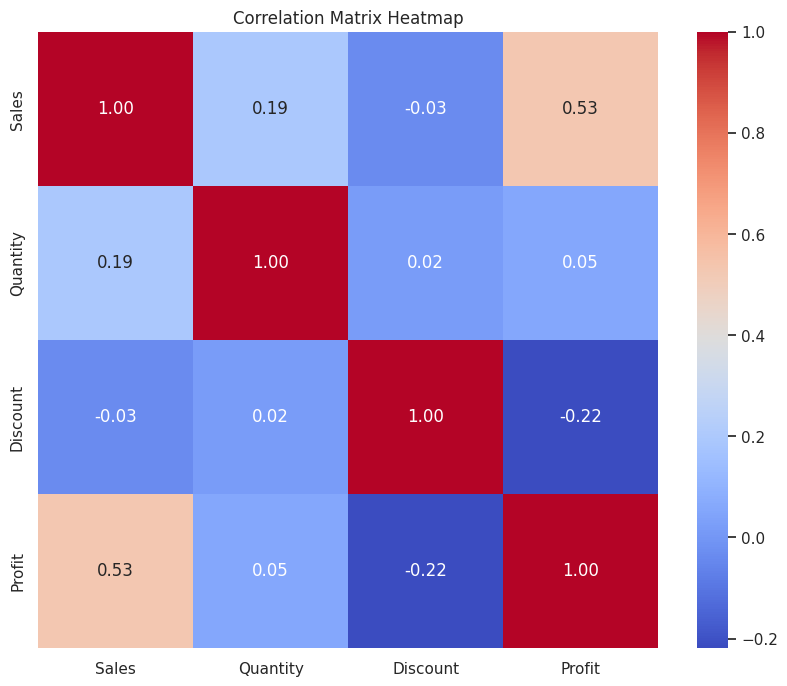

In [ ]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Detect and handle outliers in numerical columns
# Define a function to identify outliers using IQR
def detect_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

In [ ]:
# Handle outliers in numerical columns
for col in numerical_cols:
    outliers = detect_outliers(df[col])
    df = df[~df[col].isin(outliers)]

# Exploratory Data Analysis:

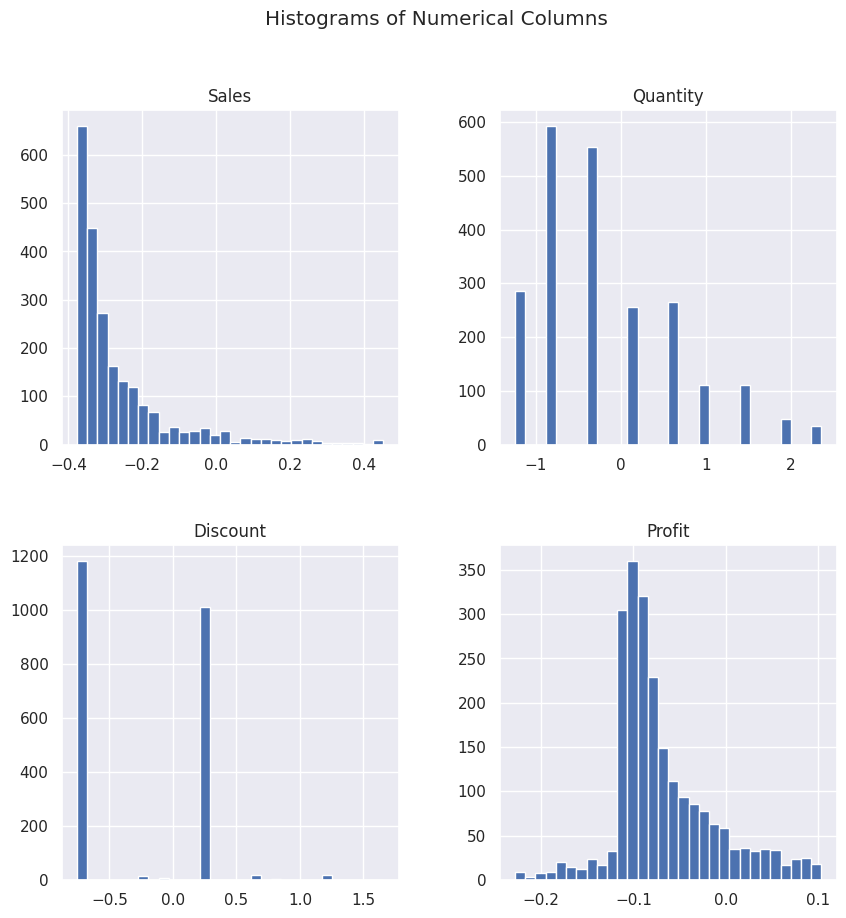

In [ ]:
# Create data visualizations using histograms, boxplots, violin plots, strips, scattered plots
# Histogram for numerical columns
df[numerical_cols].hist(figsize=(10, 10), bins=30)
plt.suptitle("Histograms of Numerical Columns")
plt.show()

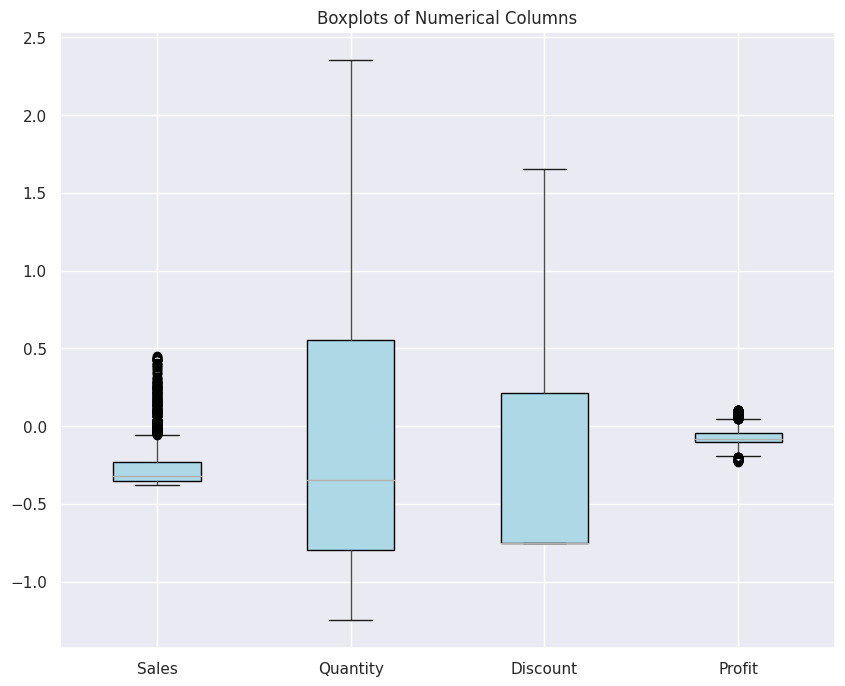

In [ ]:
# Boxplot for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
fig, ax = plt.subplots(figsize=(10, 8))
df.boxplot(column=numerical_cols, ax=ax, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplots of Numerical Columns")
plt.show()

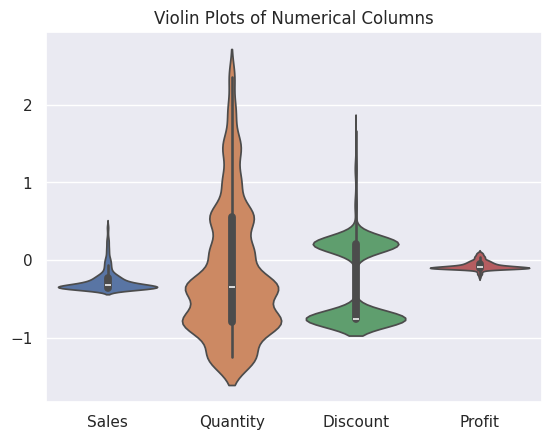

In [ ]:
# Violin plot for numerical columns
sns.violinplot(data=df[numerical_cols])
plt.title("Violin Plots of Numerical Columns")
plt.show()

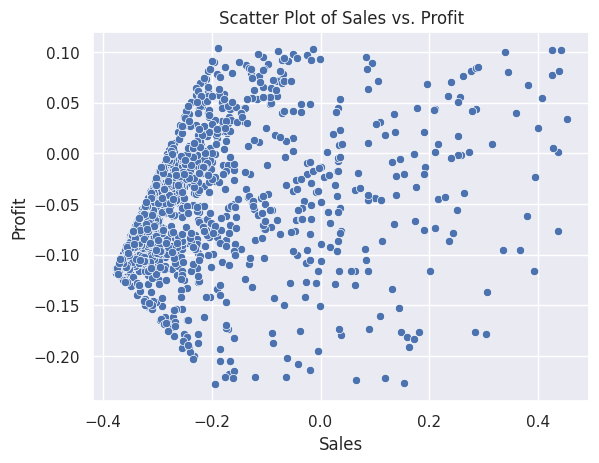

In [ ]:
# Scatter plot of Sales and Profit
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Scatter Plot of Sales vs. Profit")
plt.show()

In [ ]:
fig = px.strip(df, x="Quantity", y="Sales", orientation="h", color="Ship Mode")
fig.show()

In [ ]:
fig = px.strip(df, x="Quantity", y="Sales", orientation="h", color="Segment")
fig.show()

# Model Building and Evaluation:

In [ ]:
# Model Output:
# Linear Regression (LR)
# Define a function for training and evaluating models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': model_name,
        'Mean Squared Error': mse,
        'R-squared': r2
    }

In [ ]:
# Define features and target variable
X = df[['Sales', 'Discount', 'Quantity']]
y = df['Profit']

In [ ]:
X

,Sales,Discount,Quantity
0,-0.294717,0.209867,0.104912
2,-0.372112,-0.754317,-0.795268
5,0.152689,0.691960,0.104912
6,-0.356502,0.209867,0.104912
13,-0.324024,0.209867,-0.795268
...,...,...,...
3307,-0.222896,-0.754317,1.455183
3308,-0.288088,0.209867,-0.345178
3309,-0.354506,0.209867,-0.795268
3310,-0.342860,0.209867,-0.795268


In [ ]:
y

0      -0.081267
2      -0.109501
5      -0.226770
6      -0.107430
13     -0.100239
          ...   
3307   -0.105367
3308   -0.034818
3309   -0.097962
3310   -0.089874
3311   -0.119146
Name: Profit, Length: 2257, dtype: float64

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Sales,Discount,Quantity
553,-0.266203,0.209867,-0.795268
155,-0.275796,1.174052,0.555003
2847,-0.334129,-0.754317,-0.345178
178,0.033152,0.209867,-1.245359
249,-0.042028,0.209867,-0.795268
...,...,...,...
2401,-0.368729,-0.754317,-0.345178
1613,-0.368763,-0.754317,-0.795268
1662,-0.359639,-0.754317,-1.245359
1897,-0.359851,0.209867,-0.345178


In [ ]:
X_test

,Sales,Discount,Quantity
821,-0.369652,0.209867,-0.795268
648,-0.300677,0.209867,-0.795268
2211,-0.360548,0.209867,-0.795268
1990,-0.173294,-0.754317,-0.795268
374,-0.194686,-0.754317,1.905274
...,...,...,...
3076,-0.179527,0.209867,1.455183
457,-0.323190,0.209867,-0.345178
890,-0.085592,0.209867,-0.345178
2777,-0.256799,0.209867,-0.795268


In [ ]:
y_train

553    -0.018350
155    -0.166235
2847   -0.077131
178     0.007796
249    -0.208177
          ...   
2401   -0.115953
1613   -0.110668
1662   -0.104928
1897   -0.102165
1274   -0.036686
Name: Profit, Length: 1805, dtype: float64

In [ ]:
y_test

821    -0.109352
648    -0.067363
2211   -0.101106
1990    0.022229
374    -0.001149
          ...   
3076   -0.020466
457    -0.106650
890    -0.143203
2777   -0.123993
631     0.024533
Name: Profit, Length: 452, dtype: float64

In [ ]:
# Define models
linear_regression_model = LinearRegression()
knn_model = KNeighborsRegressor()
decision_tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()

In [ ]:
# Train and evaluate models
results = []
results.append(train_evaluate_model(linear_regression_model, X_train, y_train, X_test, y_test, 'Linear Regression'))
results.append(train_evaluate_model(knn_model, X_train, y_train, X_test, y_test, 'K-Nearest Neighbors'))
results.append(train_evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, 'Decision Tree'))
results.append(train_evaluate_model(random_forest_model, X_train, y_train, X_test, y_test, 'Random Forest'))

In [ ]:
# Create a DataFrame to store the performance results
results_df = pd.DataFrame(results, columns=['Model', 'Mean Squared Error', 'R-squared'])

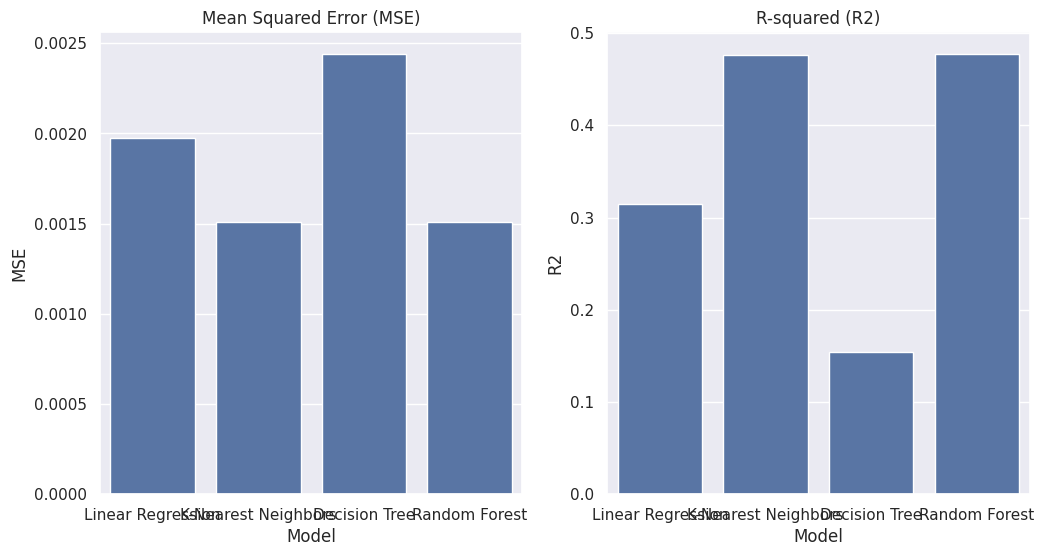

In [ ]:
# Plot the performance of different models
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot Mean Squared Error for each model
sns.barplot(x='Model', y='Mean Squared Error', data=results_df, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')
# Plot R-squared for each model
sns.barplot(x='Model', y='R-squared', data=results_df, ax=axes[1])
axes[1].set_title('R-squared (R2)')
axes[1].set_ylabel('R2')

plt.show()

# Result

Key Insights from Exploratory Data Analysis:

In [ ]:
# Display the most sold products and their categories
print("Top 10 Most Sold Products and Their Categories:")
table

Top 10 Most Sold Products and Their Categories:


,State,Category,TOTAL QUANTITY
0,California,Office Supplies,1620
1,Texas,Office Supplies,805
2,New York,Office Supplies,763
3,California,Furniture,524
4,California,Technology,489
...,...,...,...
127,Iowa,Technology,3
128,South Dakota,Technology,3
129,District of Columbia,Furniture,2
130,Nebraska,Furniture,2


In [ ]:
# Category-wise percentages of total quantity
print("\nCategory-wise Percentages of Total Quantity:")
print(df.groupby('Category')['Quantity'].sum().sort_values(ascending=False))


Category-wise Percentages of Total Quantity:
Category
Technology         -95.986117
Furniture         -152.832855
Office Supplies   -153.522124
Name: Quantity, dtype: float64


In [ ]:
# Monthly trends in sales and quantity
print("\nMonthly Trends in Sales and Quantity:")
monthly_summary = df.groupby('Month').agg({'Sales': 'sum', 'Quantity': 'sum'})
monthly_summary


Monthly Trends in Sales and Quantity:


,Sales,Quantity
Month,,
April,-36.324544,-30.426217
August,-37.444176,-13.728843
December,-87.026619,-57.542530
February,-17.925237,-22.977982
January,-28.144808,-11.038629
July,-39.626968,-20.645993
June,-40.730007,-29.918506
March,-42.288926,-24.067332
May,-42.681874,-40.405938


In [ ]:
# Quantity changes by state and category
print("\nQuantity Changes by State and Category:")
state_category_summary = df.groupby(['State', 'Category']).agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
state_category_summary.head(15)


Quantity Changes by State and Category:


Quantity
State          Category                 
Mississippi    Office Supplies  5.025465
Delaware       Office Supplies  4.649847
Tennessee      Office Supplies  3.567020
New Hampshire  Office Supplies  3.465370
Maryland       Office Supplies  2.578779
Utah           Technology       2.460277
South Dakota   Office Supplies  2.324923
New Mexico     Office Supplies  2.159129
               Technology       1.665008
Arkansas       Technology       1.665008
South Carolina Office Supplies  1.560096
Virginia       Furniture        1.560096
Illinois       Office Supplies  1.343748
Colorado       Technology       1.154036
Michigan       Office Supplies  1.137185

In [ ]:
# Model Performance Summary:
print("\nModel Performance Summary:")
results_df


Model Performance Summary:


,Model,Mean Squared Error,R-squared
0,Linear Regression,0.001976,0.314976
1,K-Nearest Neighbors,0.001511,0.476187
2,Decision Tree,0.002439,0.154479
3,Random Forest,0.001509,0.477027
